In [270]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [271]:
def read_csv_get_info(name):
    
    data = pd.read_csv(name)
    print('Data head:')
    display(data.head())
    print('Data columns:')
    display(data.columns)
    print('Data description:')
    display(data.describe())
    print('Data info:')
    display(data.info())
    
    return data

In [272]:
data = read_csv_get_info('mtcars.csv')

Data head:


,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


Data columns:


Index(['model', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am',
       'gear', 'carb'],
      dtype='object')

Data description:


,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   model   32 non-null     object 
 1   mpg     32 non-null     float64
 2   cyl     32 non-null     int64  
 3   disp    32 non-null     float64
 4   hp      32 non-null     int64  
 5   drat    32 non-null     float64
 6   wt      32 non-null     float64
 7   qsec    32 non-null     float64
 8   vs      32 non-null     int64  
 9   am      32 non-null     int64  
 10  gear    32 non-null     int64  
 11  carb    32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


None

In [273]:
def split_sample(sample, train_size, permute):
    sample_copy = sample.copy()
    size = int(train_size * len(sample_copy))
    
    if permute == True:
        np.random.seed(0)
        shuffled_indeces = np.arange(len(sample))
        np.random.shuffle(shuffled_indeces)
        indeces_train = shuffled_indeces[:size]
        indeces_test = shuffled_indeces[size:]

    elif permute == False:
        indeces_train = np.arange(len(sample))[:size]
        indeces_test = np.arange(len(sample))[size:]

    train_sample = sample_copy.iloc[indeces_train]
    test_sample = sample_copy.iloc[indeces_test]
    return train_sample, test_sample

In [274]:
def loss_l1(Y_hat, Y):
    Y_hat_arr, Y_arr = np.array(Y_hat), np.array(Y)
    return (np.abs(Y_hat_arr - Y_arr)).mean()

In [275]:
def loss_l2(Y_hat, Y):
    Y_hat_arr, Y_arr = np.array(Y_hat), np.array(Y)
    return (np.square((Y_hat_arr - Y_arr))).mean()

In [276]:
def loss_huber(Y_hat, Y, delta=1.35):
    Y_hat_arr, Y_arr = np.array(Y_hat), np.array(Y)
    Y_abs_diff = np.abs(Y_arr - Y_hat_arr)
    return np.where(Y_abs_diff < delta, 0.5 * Y_abs_diff ** 2 , delta * (Y_abs_diff - 0.5 * delta ** 2)).mean()

In [277]:
regressors_ind = 'hp'
explained_var_ind = 'mpg'

In [278]:
train_sample, test_sample = split_sample(data, 0.9, True)

In [279]:
def x_y_splitting(data, regressors_ind, explained_var_ind):
    df = pd.DataFrame(data[regressors_ind])
    n = df.shape[0]
    X = df.copy()
    Y = pd.DataFrame(data[explained_var_ind])
    return X, Y

In [280]:
X_train, Y_train = x_y_splitting(train_sample, regressors_ind, explained_var_ind)

In [281]:
train_sample

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
11,Merc 450SE,16.4,8,275.8,180,3.07,4.070,17.40,0,0,3,3
22,AMC Javelin,15.2,8,304.0,150,3.15,3.435,17.30,0,0,3,2
10,Merc 280C,17.8,6,167.6,123,3.92,3.440,18.90,1,0,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
16,Chrysler Imperial,14.7,8,440.0,230,3.23,5.345,17.42,0,0,3,4
14,Cadillac Fleetwood,10.4,8,472.0,205,2.93,5.250,17.98,0,0,3,4
28,Ford Pantera L,15.8,8,351.0,264,4.22,3.170,14.50,0,1,5,4
26,Porsche 914-2,26.0,4,120.3,91,4.43,2.140,16.70,0,1,5,2
20,Toyota Corona,21.5,4,120.1,97,3.70,2.465,20.01,1,0,3,1
13,Merc 450SLC,15.2,8,275.8,180,3.07,3.780,18.00,0,0,3,3


In [282]:
covXX = X_train.T.dot(X_train)
covXX

,hp
hp,721053


In [283]:
eigs_covXX = np.linalg.eig(covXX)[0]
eigs_covXX

array([721053.])

In [284]:
conv_num_covXX = max(abs(eigs_covXX)) / min(abs(eigs_covXX))
conv_num_covXX

1.0

In [285]:
beta_OLS_explicit_family = (np.linalg.inv(covXX)).dot(X_train.T).dot(Y_train)
beta_OLS_explicit_family

array([[0.1031515]])

In [286]:
def feature_normalize(df, mu=None, sigma=None):
    df_normalized = df.copy()
    if mu is None and sigma is None:
        mu = df_normalized.mean()
        sigma = df_normalized.std(ddof=1)
    df_normalized = (df_normalized - mu) / sigma
    return df_normalized, mu, sigma

In [287]:
def eigens_and_conidtion(X, printing='yes'):
    covXX = X.T.dot(X)
    if printing == 'yes':
        eigs_covXX = np.linalg.eig(covXX)[0]
        cond_num_covXX = max(abs(eigs_covXX)) / min(abs(eigs_covXX))
    
        print('eigenvalues: {}'.format(eigs_covXX))
        print('condition number: {}'.format(cond_num_covXX))
    return covXX

In [288]:
def insert_ones(X):
    X_copy = X.copy()
    n = X.shape[0]
    X_copy.insert(0, "Ones", np.ones((n, 1)), True)
    return X_copy

In [289]:
def model_coeffs(X_train, Y_train, covXX):
    return np.linalg.pinv(covXX).dot(X_train.T).dot(Y_train)

def model_predict(X, coeffs):
    return X.dot(coeffs)

In [290]:
def in_sample_error(X_is, Y_is, coeffs, name):
    Y_hat_is = model_predict(X_is, coeffs)
    MSE_is = (np.square(Y_hat_is - Y_is)).mean()
    return MSE_is

def out_of_sample_error(X_os, Y_os, coeffs, name):
    Y_hat_os = mode_predict(X_os, coeffs)
    MSE_os = (np.square(Y_hat_os - Y_os)).mean()
    return MSE_os

def LOOCV_error_L2(X_train, Y_train, coeffs, covXX, explained_var_ind):
    L = X_train.dot(np.linalg.pinv(covXX).dot(X_train.T))
    Y_hat_train = model_predict(X_train, coeffs)
    LOOCV = (np.square(Y_train[explained_var_ind ] - Y_hat_train[0]) / np.square(1 - np.diag(L))).mean()
    return LOOCV

def print_errors(MSE_is, MSE_os, LOOCV):
    print('in-sample squared error: {}'.format(MSE_is))
    print('out-of-sample squared error: {}'.format(MSE_os))
    print('leave-one-out corss-validation score: {}'.format(LOOCV))

In [456]:
def leave_one_out_cross_val_error(X_train, Y_train, loss):
    
    lst = []
    n = len(X_train)
    indeces = np.array(X_train.index.copy())
    if loss == 'l1':
        func = loss_l1
    elif loss == 'huber':
        func = loss_huber
        
    if (loss == 'l1') or (loss == 'huber'):
        for iteration in range(n):
            X_train_copy = X_train.copy()
            Y_train_copy = Y_train.copy()
            
            X_i_sample = X_train_copy.iloc[iteration]
            Y_i_sample = Y_train_copy.iloc[iteration]
            
            X_train_copy.drop(indeces[iteration], inplace=True)
            Y_train_copy.drop(indeces[iteration], inplace=True)
            
            X_train_copy, mu, sigma = feature_normalize(X_train_copy)
            X_train_copy = insert_ones(X_train_copy)
            
            covXX_i_hat = eigens_and_conidtion(X_train_copy, 'no')
            beta_i_hat = model_coeffs(X_train_copy, Y_train_copy, covXX_i_hat)
            
            X_i_sample = pd.DataFrame(data=np.array(X_i_sample), index=[indeces[iteration]], columns=X_i_sample.index)
            X_i_sample, _, _ = feature_normalize(X_i_sample, mu, sigma)
        
            X_i_sample = insert_ones(X_i_sample)

            Y_train_predicted_i_hat_sample = model_predict(X_i_sample, beta_i_hat)
            
            error = func(Y_train_predicted_i_hat_sample, Y_i_sample)
            lst.append(error)
    elif loss == 'l2':
        explained_var = Y_train.columns[0]
        X_train, _, _ = feature_normalize(X_train)
        X_train = insert_ones(X_train)
        covXX = eigens_and_conidtion(X_train, 'no')
        L = X_train.dot(np.linalg.pinv(covXX).dot(X_train.T))
        beta_OLS = model_coeffs(X_train, Y_train, covXX)
        Y_hat_train = model_predict(X_train, beta_OLS)
        R_LOOCV = (np.square(Y_train[explained_var] - Y_hat_train[0]) / np.square(1 - np.diag(L))).mean()
    
    if loss != 'l2':
        R_LOOCV = np.array(lst).mean()
    
    return R_LOOCV

In [457]:
import math

def k_fold_cross_val_score(X_train, Y_train, loss, k=10):
    
    lst = []
    n = len(X_train)
    indeces = np.array(X_train.index.copy())
    size_out = math.ceil(n / k)
    if loss == 'l1':
        func = loss_l1
    elif loss == 'l2':
        func = loss_l2
    elif loss == 'huber':
        func = loss_huber
        
    for iteration in range(k):
            X_train_copy = X_train.copy()
            Y_train_copy = Y_train.copy()
            
            if iteration != (k - 1):
                X_i_samples = X_train_copy.iloc[(iteration * size_out):((iteration + 1) * size_out)]
                Y_i_samples = Y_train_copy.iloc[(iteration * size_out):((iteration + 1) * size_out)]
            
                X_train_copy.drop(indeces[(iteration * size_out):((iteration + 1) * size_out)], inplace=True)
                Y_train_copy.drop(indeces[(iteration * size_out):((iteration + 1) * size_out)], inplace=True)
                
            else:
                X_i_samples = X_train_copy.iloc[(iteration * size_out):]
                Y_i_samples = Y_train_copy.iloc[(iteration * size_out):]
            
                X_train_copy.drop(indeces[(iteration * size_out):], inplace=True)
                Y_train_copy.drop(indeces[(iteration * size_out):], inplace=True)
                
            X_train_copy, mu, sigma = feature_normalize(X_train_copy)
            X_train_copy = insert_ones(X_train_copy)
            
            covXX_i_hat = eigens_and_conidtion(X_train_copy, 'no')
            beta_i_hat = model_coeffs(X_train_copy, Y_train_copy, covXX_i_hat)
            
            X_i_samples, _, _ = feature_normalize(X_i_samples, mu, sigma)
            X_i_samples = insert_ones(X_i_samples)
            Y_train_predicted_i_hat_samples = model_predict(X_i_samples, beta_i_hat)
            
            error = func(Y_train_predicted_i_hat_samples, Y_i_samples)
            lst.append(error)

    R_LOOCV = np.array(lst).mean()
    
    return R_LOOCV

In [422]:
X_train, Y_train = x_y_splitting(train_sample, regressors_ind, explained_var_ind)

In [406]:
#X_train, mu, sigma = feature_normalize(X_train)

In [407]:
#X_train = insert_ones(X_train)

In [408]:
#covXX = eigens_and_conidtion(X_train)

In [409]:
beta_OLS = model_coeffs(X_train, Y_train, covXX)
beta_OLS

ValueError: shapes (2,2) and (1,28) not aligned: 2 (dim 1) != 1 (dim 0)

In [ ]:
Y_hat_train = model_predict(X_train, beta_OLS)

In [423]:
X_test, Y_test = x_y_splitting(test_sample, regressors_ind, explained_var_ind)

In [410]:
#X_test, _, _ = feature_normalize(X_test, mu, sigma)

In [411]:
#X_test = insert_ones(X_test)

In [412]:
#Y_hat_test = model_predict(X_test, beta_OLS)

In [413]:
print(loss_l1(Y_hat_test, Y_test))

3.3359880563875337


In [414]:
print(loss_l1(Y_hat_train, Y_train))

2.9334121444694605


In [434]:
R_LOOCV = leave_one_out_cross_val_error(X_train, Y_train, 'l2')
R_LOOCV

17.568231383041585

In [121]:
X_train.index
indeces = np.array(X_train.index.copy())
X_train.iloc[4]

Ones    1.000000
hp      1.197582
Name: 16, dtype: float64

In [440]:
n = len(X_train)
kfolderr = k_fold_cross_val_score(X_train, Y_train, 'l2', k = n)
kfolderr

17.568231383041585

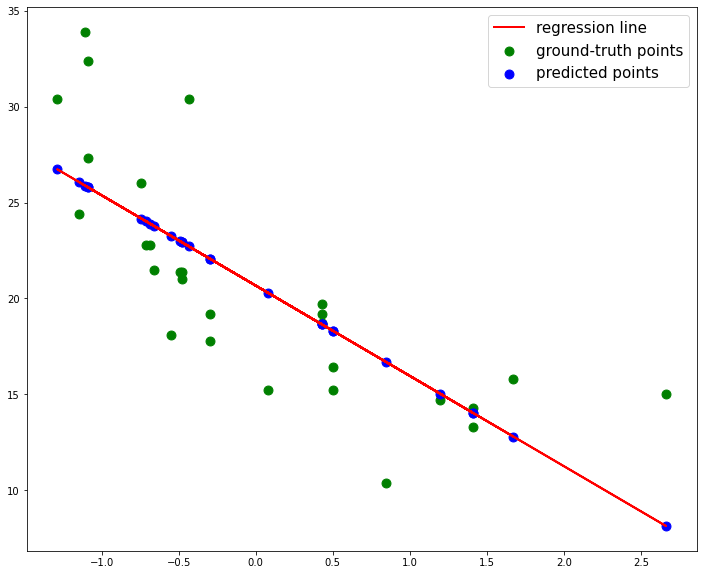

In [123]:
import matplotlib.pyplot as plt
#eps = 1

plt.figure(figsize=(12,10))
plt.scatter(X_train[regressors_ind], Y_train, label='ground-truth points', s=80, color='g')
plt.scatter(X_train[regressors_ind], Y_hat_train[0], color='blue', label='predicted points', s=80)
plt.plot(X_train[regressors_ind], Y_hat_train[0], color = 'red', label='regression line', linewidth=2)

#for i in Y_train.index:
#    if np.abs(Y_train[explained_var_ind][i] - Y_hat_train[0][i]) < eps:
#        plt.scatter(X_train[regressors_ind][i], Y_train[explained_var_ind][i], color='blue')
plt.legend(prop={'size': 15})
plt.show()

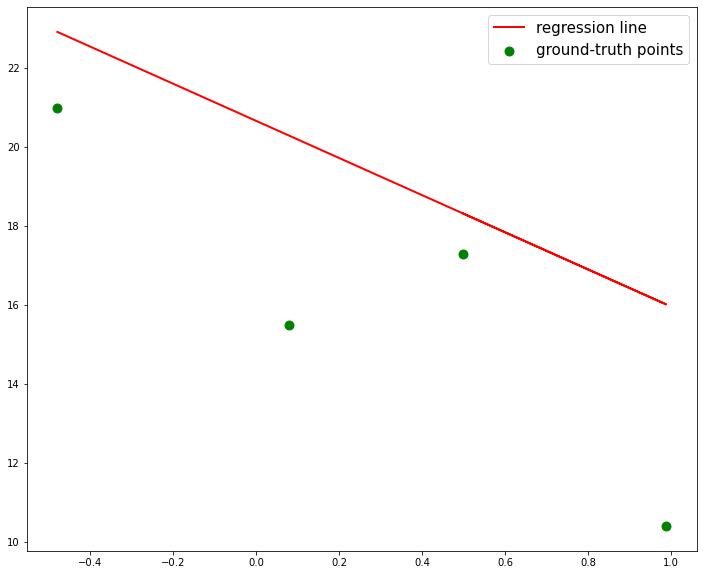

In [124]:
plt.figure(figsize=(12,10))
plt.scatter(X_test[regressors_ind], Y_test, label='ground-truth points', s=80, color='g')
plt.plot(X_test[regressors_ind], Y_hat_test[0], color = 'red', label='regression line', linewidth=2)
plt.legend(prop={'size': 15})
plt.show()

In [125]:
regressors_ind = ['hp', 'wt']
explained_var_ind = 'mpg'

In [126]:
train_sample, test_sample = split_sample(data, 0.9, True)

In [127]:
X_train, Y_train = x_y_splitting(train_sample, regressors_ind, explained_var_ind)

In [128]:
covXX = X_train.T.dot(X_train)
covXX

,hp,wt
hp,721053.000,13817.984000
wt,13817.984,298.313594


In [129]:
X_train, mu, sigma = feature_normalize(X_train)

In [130]:
X_train = insert_ones(X_train)

In [131]:
covXX = eigens_and_conidtion(X_train)

eigenvalues: [28.         44.42133077  9.57866923]
condition number: 4.63752633072207


In [132]:
beta_OLS = model_coeffs(X_train, Y_train, covXX)
beta_OLS

array([[20.66785714],
       [-2.29809565],
       [-3.73327375]])

In [133]:
Y_hat_train = model_predict(X_train, beta_OLS)

In [134]:
X_test, Y_test = x_y_splitting(test_sample, regressors_ind, explained_var_ind)
X_test, _, _ = feature_normalize(X_test, mu, sigma)
X_test = insert_ones(X_test)
Y_hat_test = model_predict(X_test, beta_OLS)

In [135]:
print(loss_l2(Y_hat_test, Y_test))

5.217972865724869


In [136]:
print(loss_l2(Y_hat_train, Y_train))

6.260345496627411


In [137]:
from mpl_toolkits.mplot3d import Axes3D

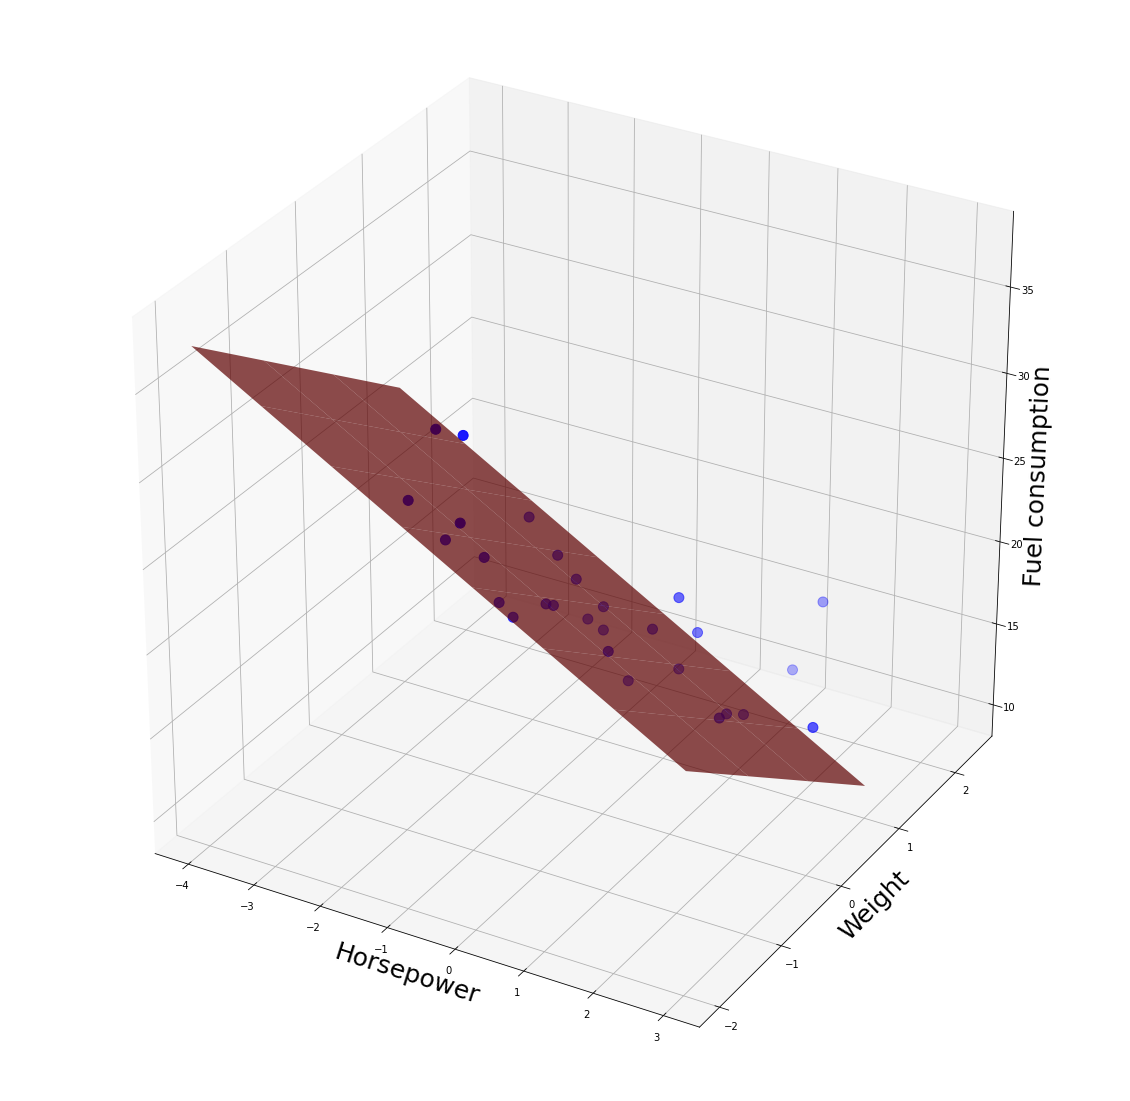

In [138]:
xx, yy = np.meshgrid(range(-4, 4), range(-2, 2))
z = beta_OLS[0] + beta_OLS[1] * xx + beta_OLS[2] * yy

fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111,projection='3d')
ax.plot_surface(xx, yy, z, color='red', alpha=0.7)
ax.scatter(X_train[regressors_ind[0]], X_train[regressors_ind[1]], Y_train[explained_var_ind], color='blue', s=100)

ax.set_xlabel('Horsepower', fontsize=25)
ax.set_ylabel('Weight', fontsize=25)
ax.set_zlabel('Fuel consumption', fontsize=25)
plt.show()

In [139]:
predictors = data.columns[2:8]
predictors    

Index(['cyl', 'disp', 'hp', 'drat', 'wt', 'qsec'], dtype='object')

In [140]:
def predictor_filtering(train_sample, predictors, explained_var):
    lst = []
    
    for predictor in predictors:
        predictor_mean = train_sample[predictor].mean()
        explained_var_mean = train_sample[explained_var].mean()
        
        predictor_demeaned = train_sample[predictor] - predictor_mean
        explained_demeaned = train_sample[explained_var] - explained_var_mean
        
        cov_predictor_explained = np.sum(predictor_demeaned * explained_demeaned)
        predictor_variance = np.sum(np.square(predictor_demeaned))
        explained_variance = np.sum(np.square(explained_demeaned))
        
        R = cov_predictor_explained / (np.sqrt(predictor_variance * explained_variance))
        #lst.append((predictor, R))
        lst.append(R)
    corr_df = pd.DataFrame(data=lst, index=predictors, columns=[explained_var])
    display(corr_df)
    
    return corr_df

In [141]:
def pairwise_corr(train_sample, predictors):
    corr_matr = np.zeros((len(predictors), len(predictors)))
    for predictor_first in predictors:
        for predictor_second in predictors:
            predictor_first_mean = train_sample[predictor_first].mean()
            predictor_second_mean = train_sample[predictor_second].mean()
        
            predictor_first_demeaned = train_sample[predictor_first] - predictor_first_mean
            predictor_second_demeaned = train_sample[predictor_second] - predictor_second_mean
        
            cov_predictor_first_predictor_second = np.sum(predictor_first_demeaned * predictor_second_demeaned)
            predictor_first_variance = np.sum(np.square(predictor_first_demeaned))
            epredictor_second_variance = np.sum(np.square(predictor_second_demeaned))
        
            R = cov_predictor_first_predictor_second / (np.sqrt(predictor_first_variance * epredictor_second_variance))
            i = int(np.where(np.array(predictors) == predictor_first)[0])
            j = int(np.where(np.array(predictors) == predictor_second)[0])
            corr_matr[i][j] = R
    corr_data = pd.DataFrame(data=corr_matr, index=predictors, columns=predictors)
    display(corr_data)
    
    return corr_data        

In [142]:
a = np.array([1, 2, 3, 4, 8])
i = np.where(a == 8)[0]
print(int(i))

4


In [143]:
print('Correlation of covariates with target')
lst = predictor_filtering(train_sample, predictors, explained_var_ind)

Correlation of covariates with target


,mpg
cyl,-0.846340
disp,-0.829015
hp,-0.776102
drat,0.652703
wt,-0.860053
qsec,0.434631


In [144]:
# drat cyl wt оставляем по методу пристального взгляда

In [145]:
print('Correlation among covariates')
d = pairwise_corr(train_sample, predictors)

Correlation among covariates


,cyl,disp,hp,drat,wt,qsec
cyl,1.000000,0.914559,0.845220,-0.661060,0.792691,-0.609725
disp,0.914559,1.000000,0.791384,-0.687565,0.871957,-0.472292
hp,0.845220,0.791384,1.000000,-0.430330,0.645234,-0.747207
drat,-0.661060,-0.687565,-0.430330,1.000000,-0.709168,0.075407
wt,0.792691,0.871957,0.645234,-0.709168,1.000000,-0.200334
qsec,-0.609725,-0.472292,-0.747207,0.075407,-0.200334,1.000000


In [556]:
'''def _forward_selection(X_train, y_train, X_test, y_test, regressors):
    set_of_covariates = regressors.copy()
    set_of_selected_covariates = []
    LOO_MSE_cov_select_models = []
    test_scores = []
    
    for regressor_ind in range(len(regressors)):
        LOO_MSE_cov_select = []
        for covariate in set_of_covariates:
            cur_covariates = set_of_selected_covariates + [covariate]
            #covXX = eigens_and_conidtion(X_train[cur_covariates], 'no')
            LOO_MSE_cov_select.append(leave_one_out_cross_val_error(X_train[cur_covariates], y_train, 'l2'))

        winning_ind = np.argmin(np.array(LOO_MSE_cov_select))
        winning_covariate = set_of_covariates[winning_ind]
        #print(winning_ind, winning_covariate)
        LOO_MSE_cov_select_models.append(LOO_MSE_cov_select[winning_ind])
        set_of_selected_covariates.append(winning_covariate)
        set_of_covariates =[
            el for el in set_of_covariates if el != winning_covariate
        ]
        
        covXX = eigens_and_conidtion(X_train[set_of_selected_covariates], 'no')
        coeffs = model_coeffs(X_train[set_of_selected_covariates], y_train, covXX)

        Y_hat = model_predict(X_test[set_of_selected_covariates], coeffs)
        test_scores.append(loss_l2(Y_hat, y_test))
        
    return LOO_MSE_cov_select_models, test_scores, set_of_selected_covariates
'''

In [610]:
def _forward_selection(X_train, y_train, X_test, y_test, regressors):
    set_of_covariates = regressors.copy()
    set_of_selected_covariates = []
    LOO_MSE_cov_select_models = []
    test_scores = []
    ser = pd.Series([0])
    
    for regressor_ind in range(len(regressors)):
        X_train_copy = X_train.copy()
        X_test_copy = X_test.copy()
        LOO_MSE_cov_select = []
        for covariate in set_of_covariates:
            cur_covariates = set_of_selected_covariates + [covariate]
            #covXX = eigens_and_conidtion(X_train[cur_covariates], 'no')
            LOO_MSE_cov_select.append(leave_one_out_cross_val_error(X_train_copy[cur_covariates], y_train, 'l2'))

        winning_ind = np.argmin(np.array(LOO_MSE_cov_select))
        winning_covariate = set_of_covariates[winning_ind]
        #print(winning_ind, winning_covariate)
        LOO_MSE_cov_select_models.append(LOO_MSE_cov_select[winning_ind])
        set_of_selected_covariates.append(winning_covariate)
        set_of_covariates =[
            el for el in set_of_covariates if el != winning_covariate
        ]
        
        X_train_copy = X_train_copy[set_of_selected_covariates]
        cols_train = X_train_copy.columns
        
        X_train_copy, mu, sigma = feature_normalize(X_train_copy)
        X_train_copy = insert_ones(X_train_copy)
        
        #print(X_train_copy)
        
        covXX = eigens_and_conidtion(X_train_copy, 'no')
        coeffs = model_coeffs(X_train_copy, y_train, covXX)
        

        #print(X_test_copy[set_of_selected_covariates])
        
        if type(ser) == type(X_test_copy):
            X_test_copy = pd.DataFrame(data=np.array(X_test_copy[set_of_selected_covariates]).reshape(1, regressor_ind + 1),
                                       index=[regressor_ind],
                                       columns=set_of_selected_covariates)
        X_test_copy, _, _ = feature_normalize(X_test_copy[set_of_selected_covariates], mu, sigma)
        X_test_copy = insert_ones(X_test_copy)

        #print(X_test_copy)
        Y_hat = model_predict(X_test_copy, coeffs)
        test_scores.append(loss_l2(Y_hat, y_test))
        
    return LOO_MSE_cov_select_models, test_scores, set_of_selected_covariates

In [611]:
def simple_forward_selection(table, regressors, explained_var_ind):
    #train_length = table.shape[0]
    
    X_covariates = pd.DataFrame(table[regressors])
    y_train = pd.DataFrame(table[explained_var_ind])
    
    LOO_MSE_cov_select_models, _, _ = _forward_selection(
        X_covariates, y_train, X_covariates, y_train, regressors,  #no test here
    )
    
    #rint('LOO_MSE_cov_select_models = {}'.format(LOO_MSE_cov_select_models))
    #l2_optimistic_estimate_wrong = min(LOO_MSE_cov_select_models)
    #print('l2_optimistic_estimate_wrong = {}'.format(l2_optimistic_estimate_wrong))
    
    return LOO_MSE_cov_select_models

In [612]:
table = pd.read_csv('mtcars.csv')


simple_forward_selection(table, list(table.columns[2:]), 'mpg')

[10.250711730329412,
 7.376450949602507,
 7.137652969571159,
 7.291040291991036,
 7.514015090835787,
 7.9631316107017955,
 8.2692758000048,
 8.668317212548699,
 9.56783484186502,
 12.181558006901934]

In [613]:
import datetime
forward_selection_with_cv(table, list(table.columns[2:]), 'mpg')

scores_by_covariate_count = 
 1     12.098611
2      9.504737
3      8.229506
4      9.969423
5     11.562067
6     12.213901
7     11.095895
8     12.547587
9     11.543409
10    12.181558
dtype: float64
example_of_selected_covariates = ['wt', 'cyl', 'carb']
Time spent: 0:00:18.340049


['wt', 'cyl', 'carb']

In [151]:
test_table = pd.DataFrame(data=np.arange(10), index=np.arange(10), columns=['her'])

In [152]:
test_table

,her
0,0
1,1
2,2
3,3
4,4
5,5
6,6
7,7
8,8
9,9


In [467]:
def forward_selection_with_cv(table, regressors, explained_var_ind):
    start = datetime.datetime.utcnow()
    
    indeces = table.index
    
    X_covariates = pd.DataFrame(table[regressors])
    y_train = pd.DataFrame(table[explained_var_ind])
    
    pseudo_outer_test_scores = pd.DataFrame(
        0.0, index=indeces,
        columns=np.arange(1, len(regressors) + 1),
    )
    
    for outer_testing_ind in indeces:
        X_pseudo_outer_train = X_covariates.drop(outer_testing_ind)
        y_pseudo_outer_train = y_train.drop(outer_testing_ind)
        
        X_pseudo_outer_test = X_covariates.loc[outer_testing_ind]
        y_pseudo_outer_test = y_train.loc[outer_testing_ind]
        
        #print('outer_testing_ind = {}'.format(outer_testing_ind))
        
        _, new_pseudo_outer_test_scores, set_of_selected_covariates = _forward_selection(
            X_pseudo_outer_train, y_pseudo_outer_train,
            X_pseudo_outer_test, y_pseudo_outer_test,
            regressors,
        )
        pseudo_outer_test_scores.loc[outer_testing_ind] = new_pseudo_outer_test_scores
        
    scores_by_covariate_count = pseudo_outer_test_scores.mean()
    print('scores_by_covariate_count = \n', scores_by_covariate_count)
    winning_covariate_count = scores_by_covariate_count.idxmin()
    example_of_selected_covariates = set_of_selected_covariates[:winning_covariate_count]
    print('example_of_selected_covariates = {}'.format(example_of_selected_covariates))
    print('Time spent: {}'.format(datetime.datetime.utcnow() - start))
    
    return example_of_selected_covariates

In [ ]:
'''def forward_selection_with_cv(table, regressors, explained_var_ind):
    start = datetime.datetime.utcnow()
    
    train_length = table.shape[0]
    
    X_covariates = pd.DataFrame(table[regressors])[:train_length]
    y_train = pd.DataFrame(table[explained_var_ind])[:train_length]
    
    pseudo_outer_test_scores = pd.DataFrame(
        0.0, index=np.arange(train_length),
        columns=np.arange(1, len(regressors) + 1),
    )
    
    for outer_testing_ind in range(train_length):
        X_pseudo_outer_train = X_covariates.drop(outer_testing_ind)
        y_pseudo_outer_train = y_train.drop(outer_testing_ind)
        
        X_pseudo_outer_test = X_covariates[outer_testing_ind:outer_testing_ind + 1]
        y_pseudo_outer_test = y_train[outer_testing_ind:outer_testing_ind + 1]
        
        #print('outer_testing_ind = {}'.format(outer_testing_ind))
        
        _, new_pseudo_outer_test_scores, set_of_selected_covariates = _forward_selection(
            X_pseudo_outer_train, y_pseudo_outer_train,
            X_pseudo_outer_test, y_pseudo_outer_test,
            regressors,
        )
        pseudo_outer_test_scores.iloc[outer_testing_ind] = new_pseudo_outer_test_scores
        
    scores_by_covariate_count = pseudo_outer_test_scores.mean()
    #print('scores_by_covariate_count = \n', scores_by_covariate_count)
    winning_covariate_count = scores_by_covariate_count.idxmin()
    example_of_selected_covariates = set_of_selected_covariates[:winning_covariate_count]
    #print('example_of_selected_covariates = {}'.format(example_of_selected_covariates))
    #print('Time spent: {}'.format(datetime.datetime.utcnow() - start))
    
    return example_of_selected_covariates '''

In [243]:
def final_forward_selection(table, regressors, explained_var_ind):
    X_covariates = pd.DataFrame(table[regressors])
    y_train = pd.DataFrame(table[explained_var_ind])
    
    test_scores = []
    
    for outer_testing_ind in range(len(y_train)):
        X_outer_train = X_covariates.drop(outer_testing_ind)
        y_outer_train = y_train.drop(outer_testing_ind)
        
        X_outer_test = X_covariates[outer_testing_ind:outer_testing_ind + 1]
        y_outer_test = y_train[outer_testing_ind:outer_testing_ind + 1]
        
        data_train = pd.DataFrame(data=np.hstack((np.array(X_outer_train), np.array(y_outer_train))),
                                  index=np.arange(len(y_train) - 1), columns=regressors + [explained_var_ind])
        
        data_test = pd.DataFrame(data=np.hstack((np.array(X_outer_test), np.array(y_outer_test))),
                                  index=np.arange(1), columns=regressors + [explained_var_ind])
        
        #data_train = X_outer_train.insert(len(regressors), y_outer_train, explained_var_ind)
        #data_test = X_outer_test.insert(len(regressors), y_outer_test, explained_var_ind)
        
        selected_covariates = forward_selection_with_cv(data_train, regressors, explained_var_ind)
        
        X_outer_train = X_outer_train[selected_covariates]
        X_outer_test = X_outer_test[selected_covariates]
        
        covXX_outer = eigens_and_conidtion(X_outer_train, 'no')
        coeffs_outer = model_coeffs(X_outer_train, y_outer_train, covXX_outer)

        Y_hat_outer = model_predict(X_outer_test, coeffs_outer)
        test_scores.append(loss_l2(Y_hat_outer, y_outer_test))
        
    R = np.array(test_scores).mean()
    #print(R)
    return R
        

In [187]:
final_forward_selection(table, list(table.columns[2:]), 'mpg')

scores_by_covariate_count = 
 1     22.220608
2     13.757455
3     13.174481
4     12.896836
5     14.690148
6     14.325648
7     11.933559
8     10.670323
9      9.946964
10    10.273613
dtype: float64
example_of_selected_covariates = ['drat', 'hp', 'qsec', 'wt', 'am', 'disp', 'vs', 'cyl', 'gear']
Time spent: 0:00:06.952397
scores_by_covariate_count = 
 1     22.220608
2     13.757455
3     13.143188
4     14.902225
5     14.740022
6     14.394553
7     11.928662
8     10.545703
9     10.125313
10    10.422773
dtype: float64
example_of_selected_covariates = ['drat', 'hp', 'qsec', 'am', 'wt', 'disp', 'vs', 'cyl', 'gear']
Time spent: 0:00:06.952397
scores_by_covariate_count = 
 1     22.210247
2     14.929758
3     15.780291
4     14.164610
5     13.013687
6     11.960521
7     11.612150
8     12.321222
9     10.220029
10    10.221270
dtype: float64
example_of_selected_covariates = ['drat', 'hp', 'qsec', 'wt', 'am', 'disp', 'vs', 'carb', 'cyl']
Time spent: 0:00:07.180410
scores_by_cov

scores_by_covariate_count = 
 1     22.233685
2     14.669807
3     17.226714
4     12.216022
5     12.358540
6     12.751704
7     13.274622
8     13.609306
9     14.022638
10    11.884638
dtype: float64
example_of_selected_covariates = ['drat', 'hp', 'qsec', 'wt', 'am', 'disp', 'vs', 'cyl', 'carb', 'gear']
Time spent: 0:00:07.190411
scores_by_covariate_count = 
 1     19.250992
2     12.291239
3     12.448397
4     12.738984
5     10.675110
6      9.391143
7      8.946009
8      9.010400
9      9.016966
10     9.593214
dtype: float64
example_of_selected_covariates = ['drat', 'hp', 'qsec', 'wt', 'am', 'disp', 'vs']
Time spent: 0:00:07.565433
scores_by_covariate_count = 
 1     19.914956
2     14.688015
3     10.609036
4      8.542609
5      8.401207
6      9.351104
7      9.662669
8      9.401279
9      8.624633
10     7.716085
dtype: float64
example_of_selected_covariates = ['drat', 'carb', 'gear', 'am', 'cyl', 'disp', 'hp', 'vs', 'wt', 'qsec']
Time spent: 0:00:07.120407
scores_by_co

11.065232897665528

In [460]:
def task1(train_sample, test_sample):
    regressors_ind = 'hp'
    explained_var_ind = 'mpg'
    
    X_train, Y_train = x_y_splitting(train_sample, regressors_ind, explained_var_ind)
    
    LOOCV_error_l1 = leave_one_out_cross_val_error(X_train, Y_train, 'l1')
    LOOCV_error_l2 = leave_one_out_cross_val_error(X_train, Y_train, 'l2')
    LOOCV_error_huber = leave_one_out_cross_val_error(X_train, Y_train, 'huber')
    
    k_fold_error_l1 = k_fold_cross_val_score(X_train, Y_train, 'l1')
    k_fold_error_l2 = k_fold_cross_val_score(X_train, Y_train, 'l2')
    k_fold_error_huber = k_fold_cross_val_score(X_train, Y_train, 'huber')
    
    X_train, mu, sigma = feature_normalize(X_train)
    X_train = insert_ones(X_train)
    
    covXX = eigens_and_conidtion(X_train, printing='no')
    beta_OLS = model_coeffs(X_train, Y_train, covXX)
    Y_hat_train = model_predict(X_train, beta_OLS)
    
    in_sample_error_l1 = loss_l1(Y_hat_train, Y_train)
    in_sample_error_l2 = loss_l2(Y_hat_train, Y_train)
    in_sample_error_huber = loss_huber(Y_hat_train, Y_train)
    
    X_test, Y_test = x_y_splitting(test_sample, regressors_ind, explained_var_ind)
    
    X_test, _, _ = feature_normalize(X_test, mu, sigma)
    X_test = insert_ones(X_test)
    Y_hat_test = model_predict(X_test, beta_OLS)
    
    out_of_sample_error_l1 = loss_l1(Y_hat_test, Y_test)
    out_of_sample_error_l2 = loss_l2(Y_hat_test, Y_test)
    out_of_sample_error_huber = loss_huber(Y_hat_test, Y_test)
    
    
    print('IN-SAMPLE ERRORS:')
    print('l1 : {}'.format(in_sample_error_l1))
    print('l2 : {}'.format(in_sample_error_l2))
    print('Huber : {}'.format(in_sample_error_huber))
    print('\n')
    
    print('OUT-OF-SAMPLE ERRORS:')
    print('l1 : {}'.format(out_of_sample_error_l1))
    print('l2 : {}'.format(out_of_sample_error_l2))
    print('Huber : {}'.format(out_of_sample_error_huber))
    print('\n')
    
    print('LOOCV ERRORS:')
    print('l1 : {}'.format(LOOCV_error_l1))
    print('l2 : {}'.format(LOOCV_error_l2))
    print('Huber : {}'.format(LOOCV_error_huber))
    print('\n')
    
    print('K-FOLD (K = 10) ERRORS:')
    print('l1 : {}'.format(k_fold_error_l1))
    print('l2 : {}'.format(k_fold_error_l2))
    print('Huber : {}'.format(k_fold_error_huber))
    print('\n')
    
    
    plt.figure(figsize=(12,10))
    plt.scatter(X_train[regressors_ind], Y_train, label='ground-truth points', s=80, color='g')
    plt.scatter(X_train[regressors_ind], Y_hat_train[0], color='blue', label='predicted points', s=80)
    plt.plot(X_train[regressors_ind], Y_hat_train[0], color = 'red', label='regression line', linewidth=2)

    plt.legend(prop={'size': 15})
    plt.title('Training data', size=17)
    plt.show()
    
    plt.figure(figsize=(12,10))
    plt.scatter(X_test[regressors_ind], Y_test, label='ground-truth points', s=80, color='g')
    plt.plot(X_test[regressors_ind], Y_hat_test[0], color = 'red', label='regression line', linewidth=2)
    plt.legend(prop={'size': 15})
    plt.title('Test data', size=17)
    plt.show()

In [461]:
def task2(train_sample, test_sample):
    regressors_ind = ['hp', 'wt']
    explained_var_ind = 'mpg'
    
    X_train, Y_train = x_y_splitting(train_sample, regressors_ind, explained_var_ind)
    X_train, mu, sigma = feature_normalize(X_train)
    X_train = insert_ones(X_train)
    
    covXX = eigens_and_conidtion(X_train, printing='no')
    beta_OLS = model_coeffs(X_train, Y_train, covXX)
    Y_hat_train = model_predict(X_train, beta_OLS)
    
    in_sample_error_l1 = loss_l1(Y_hat_train, Y_train)
    in_sample_error_l2 = loss_l2(Y_hat_train, Y_train)
    in_sample_error_huber = loss_huber(Y_hat_train, Y_train)
    
    X_test, Y_test = x_y_splitting(test_sample, regressors_ind, explained_var_ind)
    
    X_test, _, _ = feature_normalize(X_test, mu, sigma)
    X_test = insert_ones(X_test)
    Y_hat_test = model_predict(X_test, beta_OLS)
    
    out_of_sample_error_l1 = loss_l1(Y_hat_test, Y_test)
    out_of_sample_error_l2 = loss_l2(Y_hat_test, Y_test)
    out_of_sample_error_huber = loss_huber(Y_hat_test, Y_test)
    
    print('IN-SAMPLE ERRORS:')
    print('l1 : {}'.format(in_sample_error_l1))
    print('l2 : {}'.format(in_sample_error_l2))
    print('Huber : {}'.format(in_sample_error_huber))
    print('\n')
    
    print('OUT-OF-SAMPLE ERRORS:')
    print('l1 : {}'.format(out_of_sample_error_l1))
    print('l2 : {}'.format(out_of_sample_error_l2))
    print('Huber : {}'.format(out_of_sample_error_huber))
    print('\n')
    
    xx, yy = np.meshgrid(range(-4, 4), range(-2, 2))
    z = beta_OLS[0] + beta_OLS[1] * xx + beta_OLS[2] * yy

    fig = plt.figure(figsize=(20,20))
    ax = fig.add_subplot(111,projection='3d')
    ax.plot_surface(xx, yy, z, color='red', alpha=0.7)
    ax.scatter(X_train[regressors_ind[0]], X_train[regressors_ind[1]], Y_train[explained_var_ind], color='blue', s=100)

    ax.set_xlabel('Horsepower', fontsize=25)
    ax.set_ylabel('Weight', fontsize=25)
    ax.set_zlabel('Fuel consumption', fontsize=25)
    plt.show()

In [462]:
def task3(train_sample):
    explained_var = 'mpg'
    predictors = list(train_sample.columns[2:8])
    print('Correlations between covariates and target variable :')
    _ = predictor_filtering(train_sample, predictors, explained_var)
    print('Correlations among covariates:')
    _ = pairwise_corr(train_sample, predictors)
    print('Assuming some thresholds for correlation coefficient, in my opinion best params are : drat, cyl, wt')

In [463]:
def task4(train_sample, want_to_show_estimation_of_statistical_risk=False):
    regressors_ind = list(train_sample.columns[2:])
    explained_var_ind = 'mpg'
    
    errors = simple_forward_selection(train_sample, regressors_ind, explained_var_ind)
    
    indeces = np.arange(1, len(errors) + 1)
    
    plt.figure(figsize=(20, 20))
    plt.plot(indeces, errors, color='red')
    plt.title('Errors vs number of predictors', size=17)
    plt.xlabel('k')
    plt.ylabel('Error')
    plt.show()
    
    best_regressors = forward_selection_with_cv(train_sample, regressors_ind, explained_var_ind)
    
    print('Best regressors chosen:')
    print(best_regressors)
    
    if want_to_show_estimation_of_statistical_risk == True:
        print('Risk:')
        print(final_forward_selection(train_sample, regressors_ind, explained_var_ind))
    
    

In [470]:
def main():
    data = pd.read_csv('mtcars.csv')
    train_sample, test_sample = split_sample(data, 0.9, False)
    print('TASK 1')
    print('\n')
    task1(train_sample, test_sample)
    print('\n')
    print('\n')
    print('TASK 2')
    print('\n')
    task2(train_sample, test_sample)
    print('\n')
    print('\n')
    print('TASK 3')
    print('\n')
    task3(train_sample)
    print('\n')
    print('\n')
    print('TASK 4')
    print('\n')
    task4(train_sample)
    print('\n')
    print('\n')

TASK 1


IN-SAMPLE ERRORS:
l1 : 2.8268939490837512
l2 : 11.280998410053227
Huber : 2.680068510191993


OUT-OF-SAMPLE ERRORS:
l1 : 6.05369499593865
l2 : 56.04807981104976
Huber : 6.942300744517178


LOOCV ERRORS:
l1 : 3.0575984563730576
l2 : 13.178010929892343
Huber : 2.988877744557453


K-FOLD (K = 10) ERRORS:
l1 : 3.4407928257645772
l2 : 17.093111464005922
Huber : 3.4862664853287577




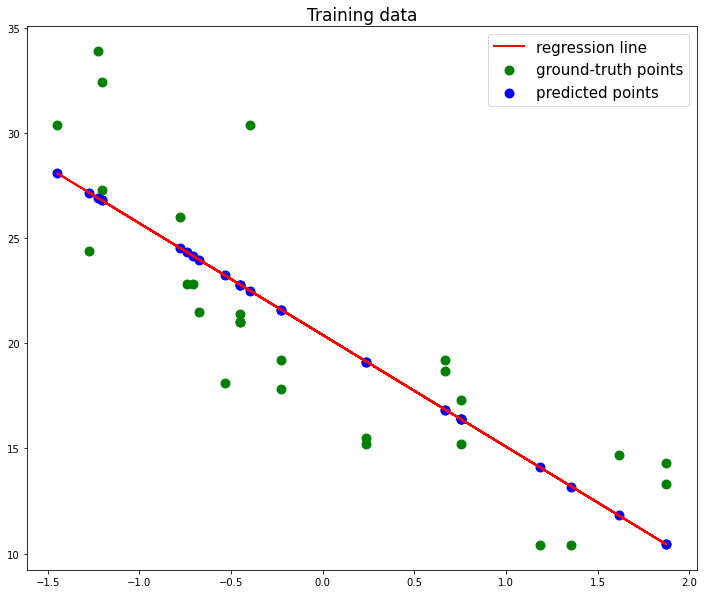

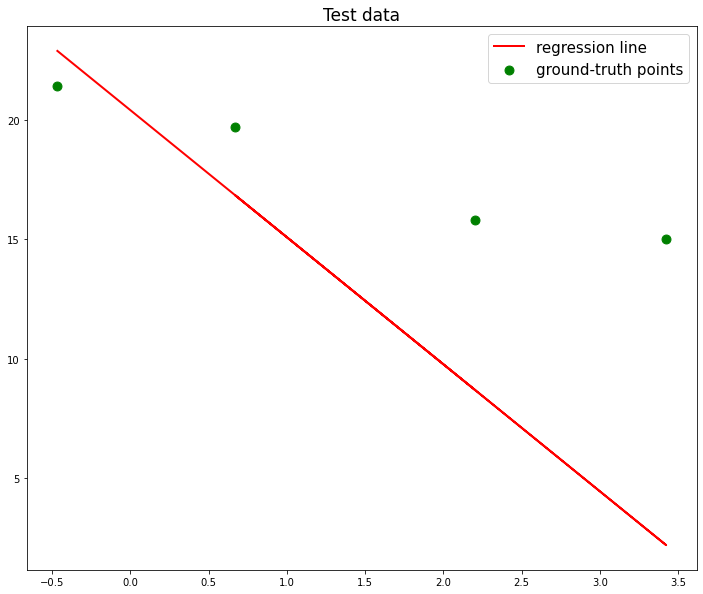





TASK 2


IN-SAMPLE ERRORS:
l1 : 1.9346450587079846
l2 : 6.54065299167856
Huber : 1.718102459376673


OUT-OF-SAMPLE ERRORS:
l1 : 1.6205448313824498
l2 : 4.338372416325524
Huber : 1.3046128665761394




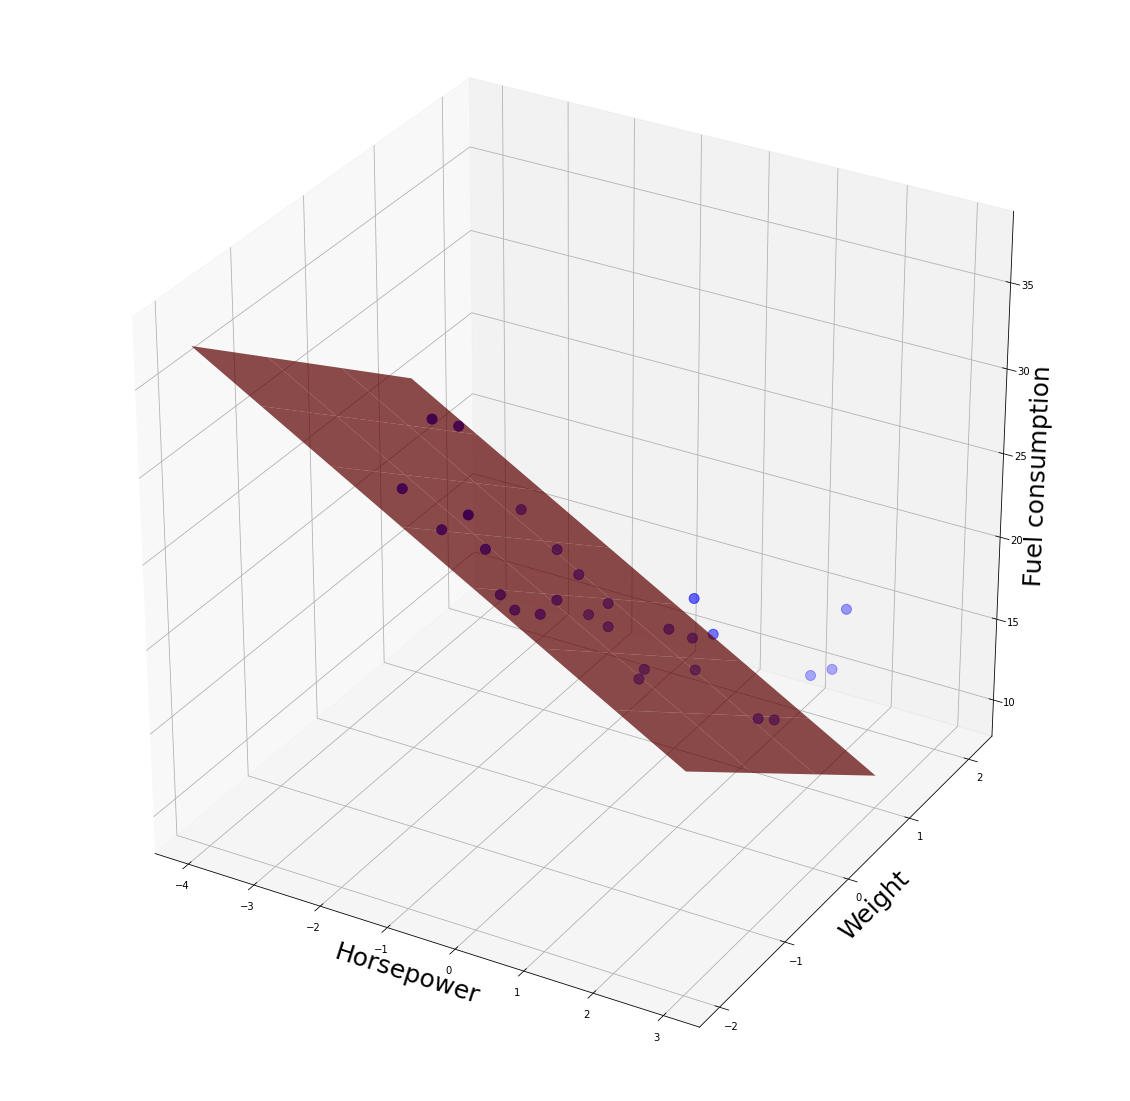





TASK 3


Correlations between covariates and target variable :


,mpg
cyl,-0.860778
disp,-0.858863
hp,-0.840712
drat,0.747582
wt,-0.884853
qsec,0.384008


Correlations among covariates:


,cyl,disp,hp,drat,wt,qsec
cyl,1.000000,0.903673,0.891127,-0.773686,0.808609,-0.580029
disp,0.903673,1.000000,0.898273,-0.778743,0.905353,-0.449885
hp,0.891127,0.898273,1.000000,-0.655562,0.804550,-0.600748
drat,-0.773686,-0.778743,-0.655562,1.000000,-0.729141,0.194097
wt,0.808609,0.905353,0.804550,-0.729141,1.000000,-0.209407
qsec,-0.580029,-0.449885,-0.600748,0.194097,-0.209407,1.000000


Assuming some thresholds for correlation coefficient, in my opinion best params are : drat, cyl, wt




TASK 4




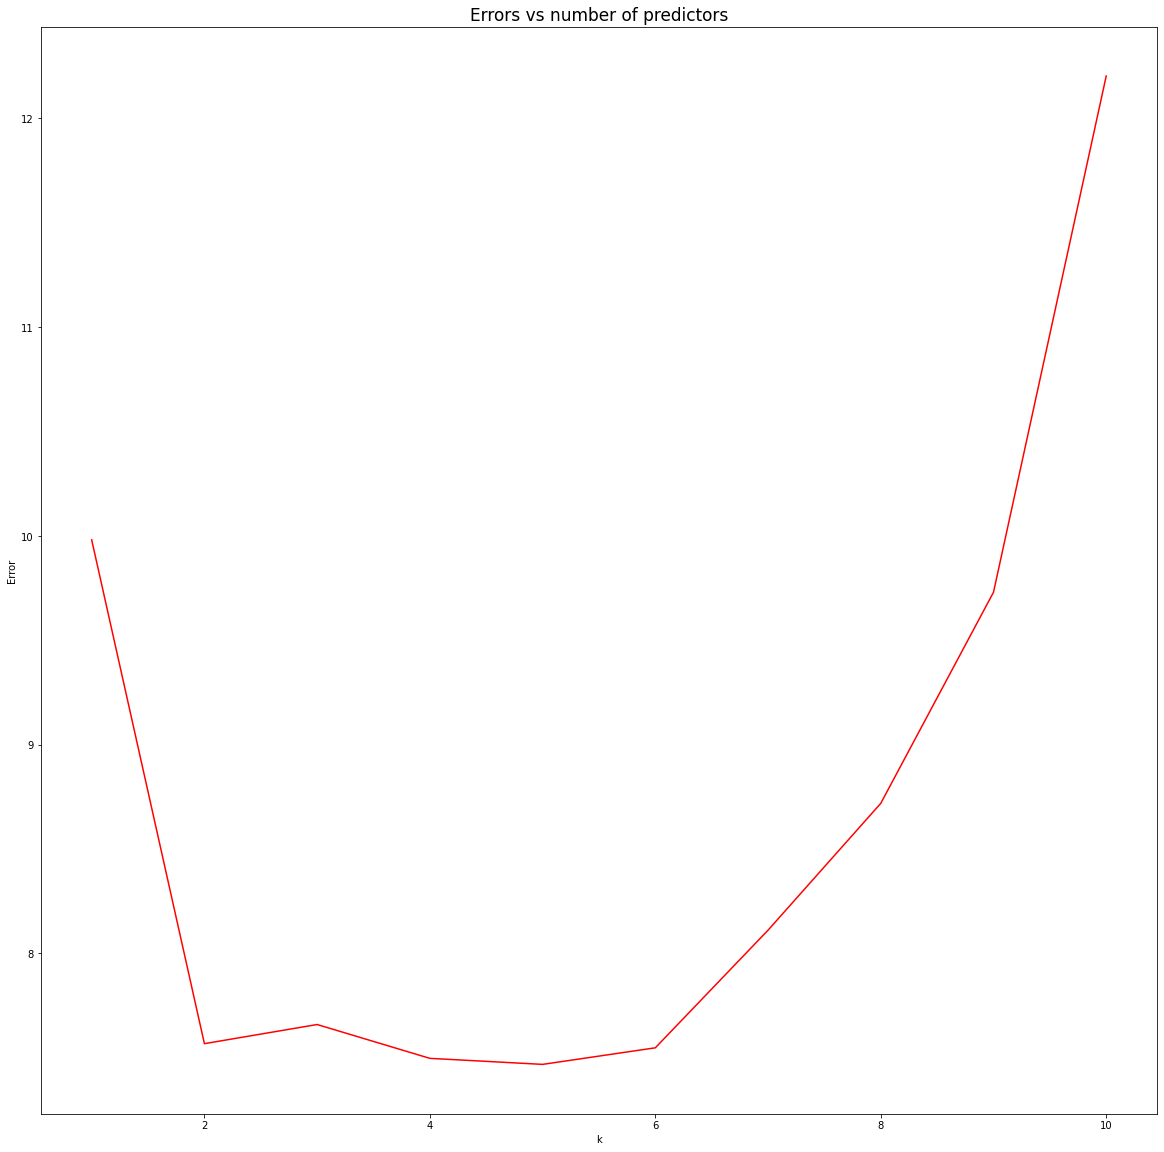

scores_by_covariate_count = 
 1     146.344675
2     147.410347
3     107.090660
4      40.024019
5      22.727264
6      10.399685
7      10.781270
8      11.308819
9       9.121790
10      9.585125
dtype: float64
example_of_selected_covariates = ['wt', 'cyl', 'hp', 'drat', 'carb', 'am', 'vs', 'disp', 'qsec']
Time spent: 0:00:12.057689
Best regressors chosen:
['wt', 'cyl', 'hp', 'drat', 'carb', 'am', 'vs', 'disp', 'qsec']






In [471]:
main()